In [58]:
import pandas as pd
import seaborn as sns

In [59]:
df = pd.read_csv("AB_NYC_2019.csv")

In [60]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [61]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [62]:
df["id"] = df["id"].astype(str)
df["host_id"] = df["host_id"].astype(str)
df["latitude"] = df["latitude"].astype(str)
df["longitude"] = df["longitude"].astype(str)

In [63]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## CATEGORICAL

In [64]:
df["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [65]:
df["neighbourhood_group"].value_counts(normalize = True)

neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [66]:
df["room_type"].value_counts(normalize = True)

room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

In [67]:
df_n = df["neighbourhood"].value_counts().reset_index()

In [68]:
df_n

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [69]:
df_n[df_n["count"]>1000]

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


## NUMERICAL

In [70]:
df["price"].value_counts()

price
150     1596
100     1517
50      1188
60      1155
75      1095
        ... 
578        1
789        1
1795       1
1095       1
323        1
Name: count, Length: 581, dtype: int64

In [71]:
bins = (0,50,100,200,500,2000,10000)

In [72]:
df["price"].value_counts(bins = bins)

(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 2000.0]        587
(2000.0, 10000.0]       35
Name: count, dtype: int64

In [73]:
df["price"].mean()

142.33252621004095

In [74]:
df["price"].std()

196.99475591833985

In [75]:
df["price"].kurt()

953.4807356344944

## BARGRAPH (categorical)

<Axes: xlabel='neighbourhood_group', ylabel='count'>

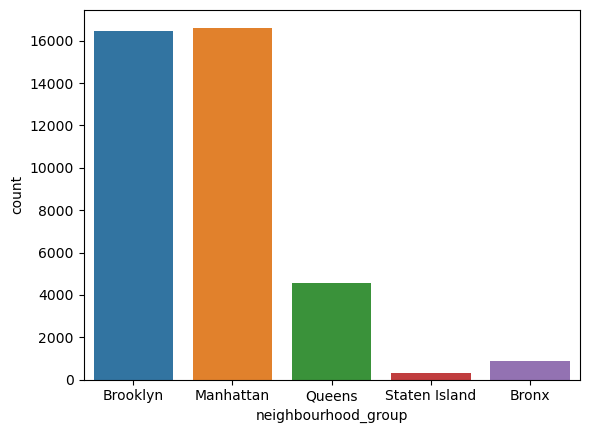

In [76]:
sns.countplot(data = df,x = "neighbourhood_group")

<Axes: xlabel='room_type', ylabel='count'>

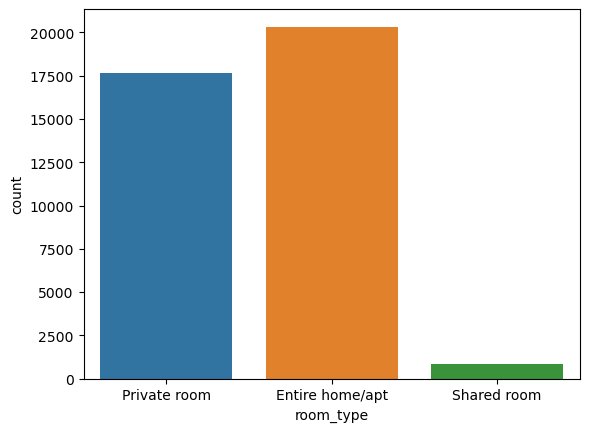

In [77]:
sns.countplot(data = df,x = "room_type")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

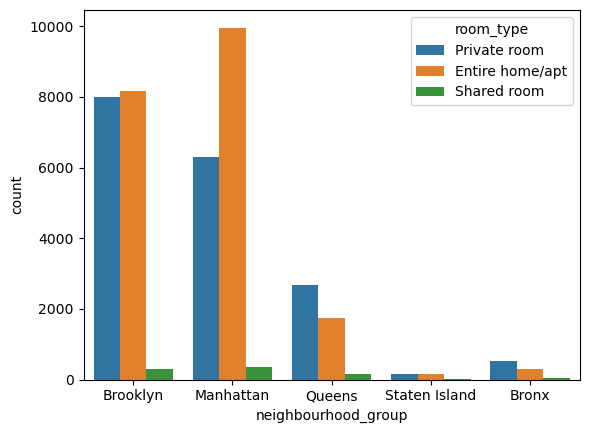

In [78]:
sns.countplot(data = df,x = "neighbourhood_group", hue = "room_type")

## PIE CHART

<Axes: ylabel='count'>

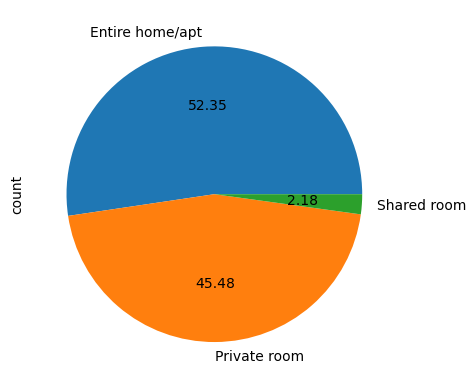

In [79]:
df["room_type"].value_counts().plot(kind="pie", autopct = "%.2f")

<Axes: ylabel='count'>

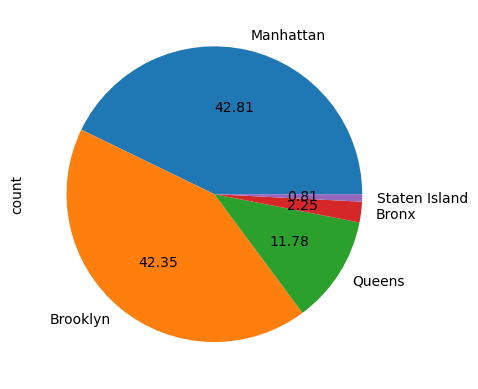

In [80]:
df["neighbourhood_group"].value_counts().plot(kind="pie", autopct = "%.2f")

## HISTOGRAM (numerical)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

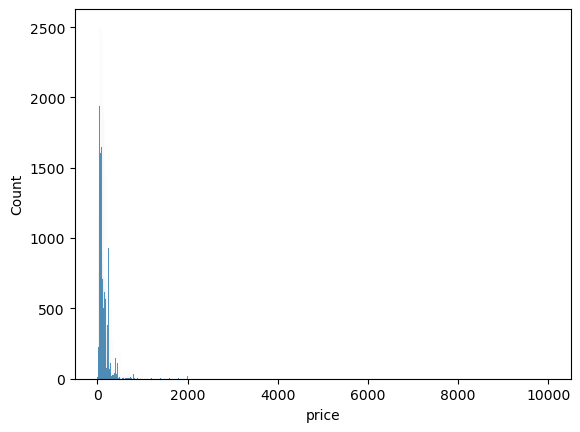

In [81]:
sns.histplot(data = df, x = "price")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

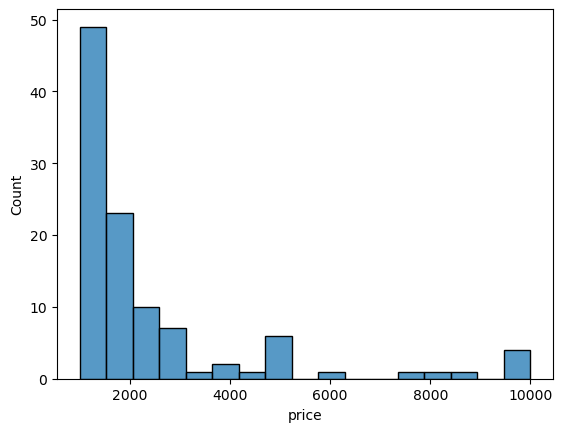

In [83]:
sns.histplot(data = df[df["price"]>1000], x = "price")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Count'>

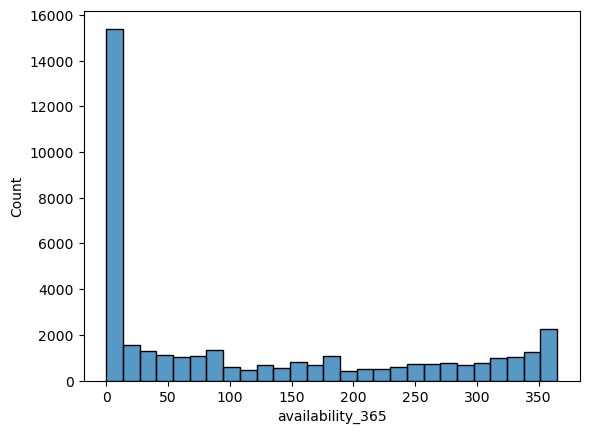

In [84]:
sns.histplot(data = df, x = "availability_365")

## DISTPLOT

/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_90810/50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

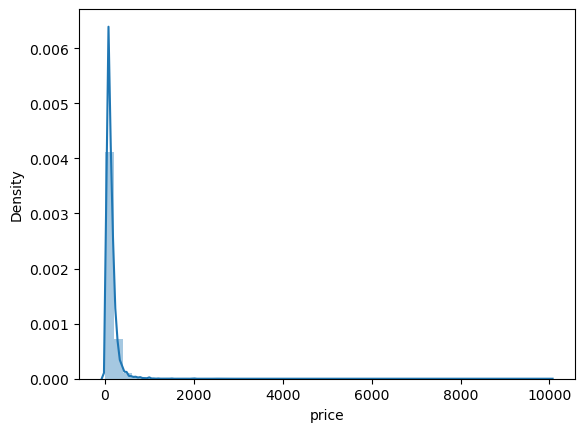

In [85]:
sns.distplot(df["price"])

## BOXPLOT

<Axes: >

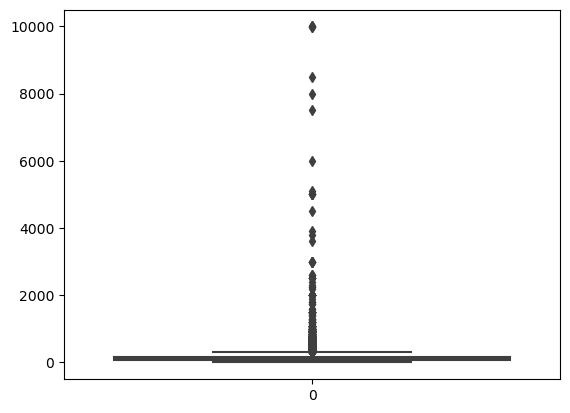

In [86]:
sns.boxplot(df["price"])